In [1]:
%%time
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

# today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

import pylab
pylab.rcParams['figure.figsize'] = (15, 7)
plt.style.use('dark_background')

#custom fetch
import fetcher
fetcher.fetch()
print(f"LOCAL FETCH: world_{today.strftime('%b-%d-%Y')}.csv")
df = pd.read_csv(f"world_{today.strftime('%b-%d-%Y')}.csv",index_col='date', parse_dates=True)
print("LOCAL FETCH COMPLETE.")
#custom fetch

usa=df[df['location'] == 'United States']
# usa_rolling7=usa.new_deaths.rolling(7).mean().fillna(0)
usa_daily=usa['total_deaths'].diff(1)
yesterday=usa_daily[-1]
usa_rolling7=usa_daily.rolling(7).mean()

File ~ world_Apr-18-2022.csv ~ Already Exists
LOCAL FETCH: world_Apr-18-2022.csv
LOCAL FETCH COMPLETE.
Wall time: 3.74 s


In [2]:
vax=[]
for x in usa.columns:
    if ('vacc' in x) or ('boost' in x):
        vax.append(x)

In [3]:
##USA UPDATE
df=df[df['location'] == 'United States']

In [4]:
df['total_vaccinations'].dropna()

date
2020-12-13        31624.0
2020-12-14        36216.0
2020-12-15        84186.0
2020-12-16       243544.0
2020-12-17       516133.0
                 ...     
2022-04-12    568270674.0
2022-04-13    568750877.0
2022-04-14    569151286.0
2022-04-15    569381601.0
2022-04-16    569397972.0
Name: total_vaccinations, Length: 490, dtype: float64

In [5]:
display(len(vax))
vax

13

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'new_people_vaccinated_smoothed',
 'new_people_vaccinated_smoothed_per_hundred']

# <font color = 'hotpink'> Vaccine Roll-out date:

In [6]:
df['total_vaccinations'].dropna().idxmin(),df['total_vaccinations'].dropna().min()

(Timestamp('2020-12-13 00:00:00'), 31624.0)

In [7]:
datetime.date(2020,12,1)

datetime.date(2020, 12, 1)

In [8]:
dt.today()

datetime.datetime(2022, 4, 18, 14, 29, 2, 170371)

(18597.0, 19100.0)

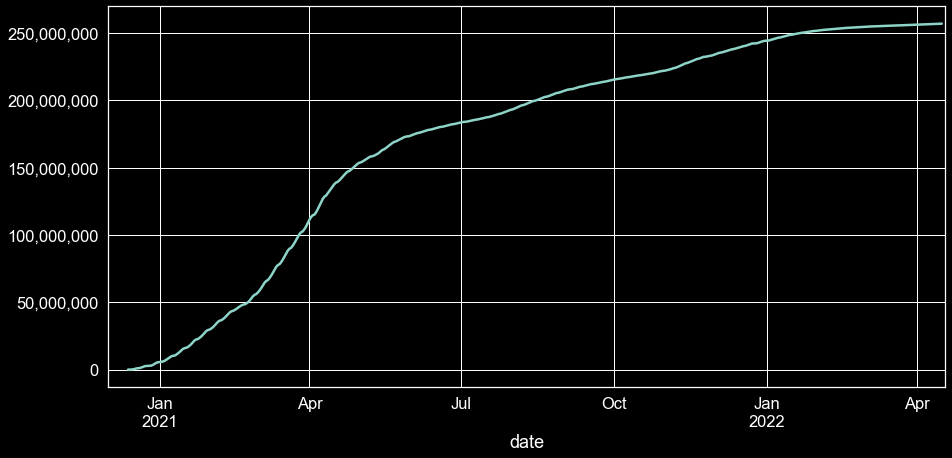

In [9]:
ax=df['people_vaccinated'].plot()
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlim([datetime.date(2020,12,1), dt.today()])


In [10]:
df['new_vaccinations'].dropna().sum()

569366348.0

In [11]:
df['total_vaccinations'].tail(1)

date
2022-04-17   NaN
Name: total_vaccinations, dtype: float64

In [12]:
df['new_vaccinations'].dropna().sum() - df['total_vaccinations'].tail(1)

date
2022-04-17   NaN
Name: total_vaccinations, dtype: float64

# <font color = "#24ff20"> `vax` plots

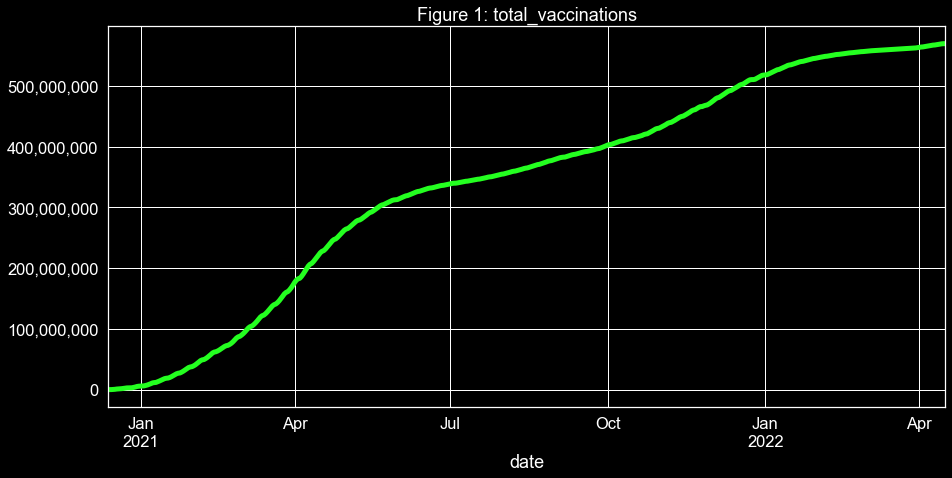

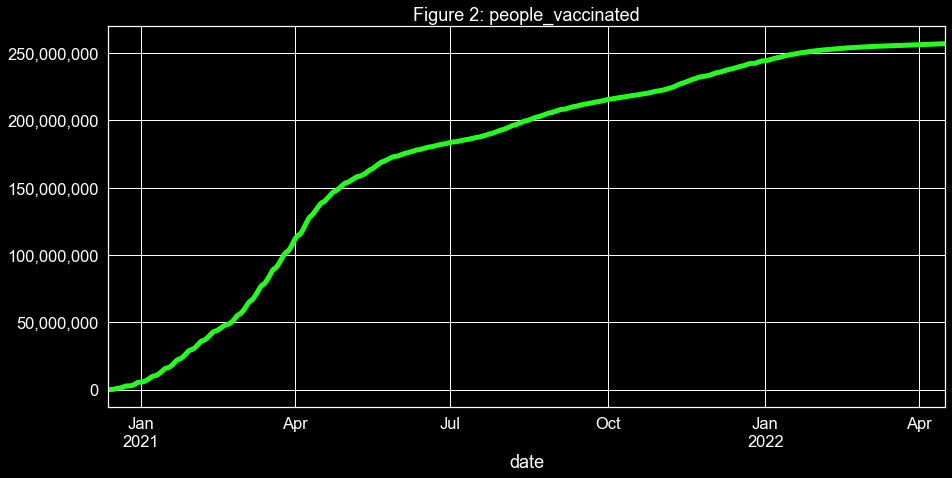

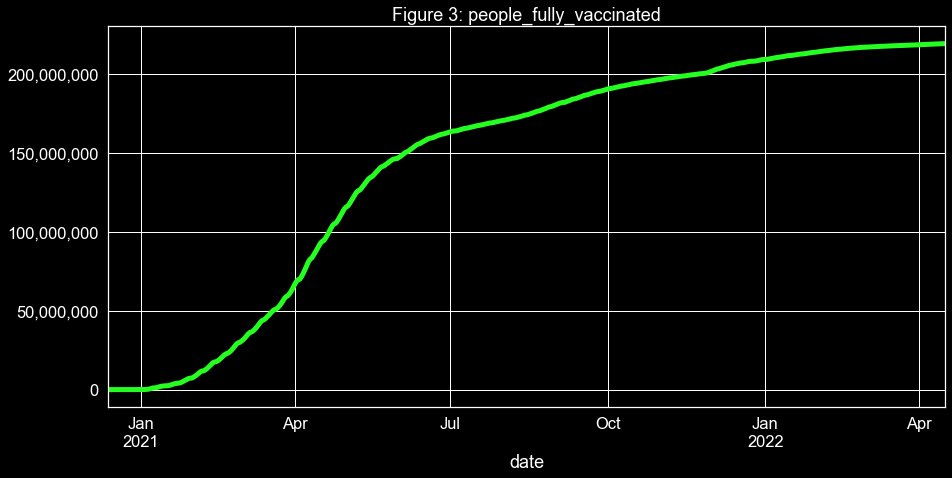

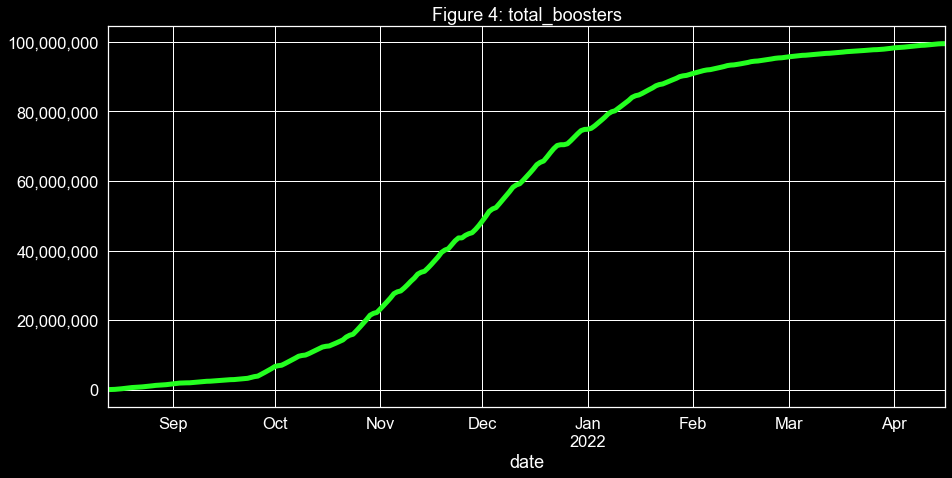

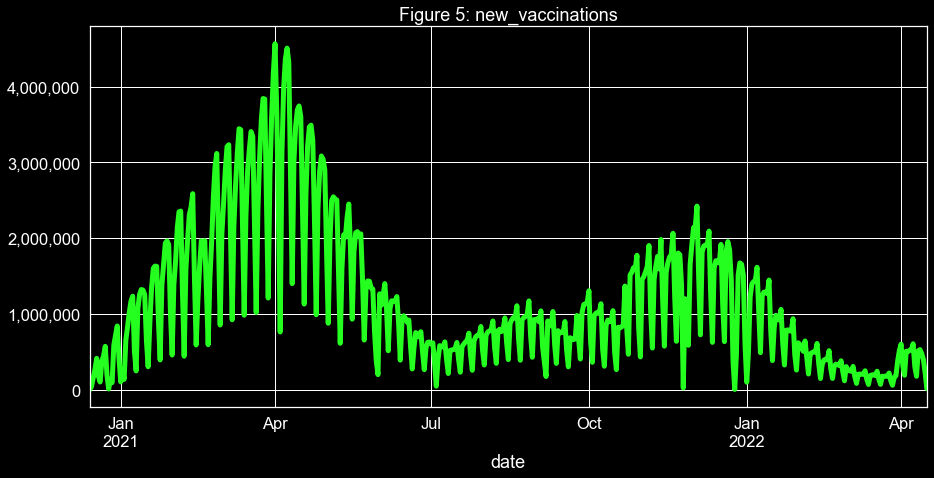

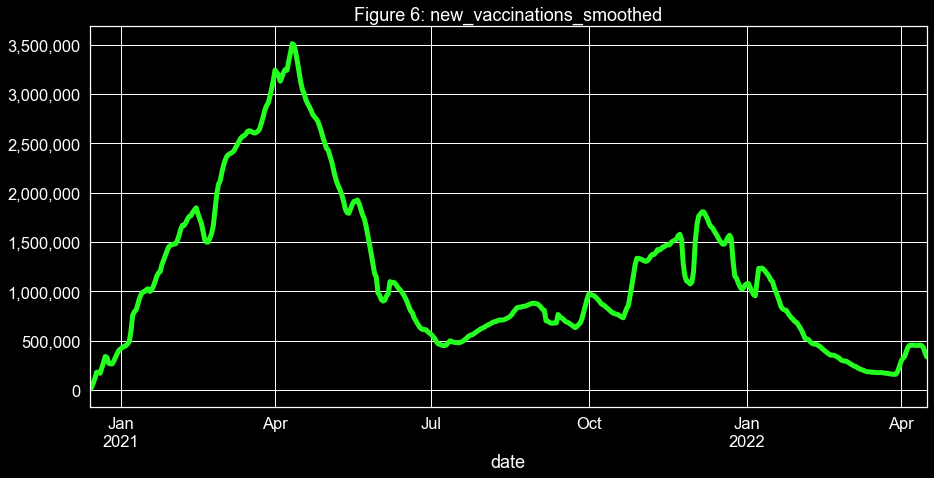

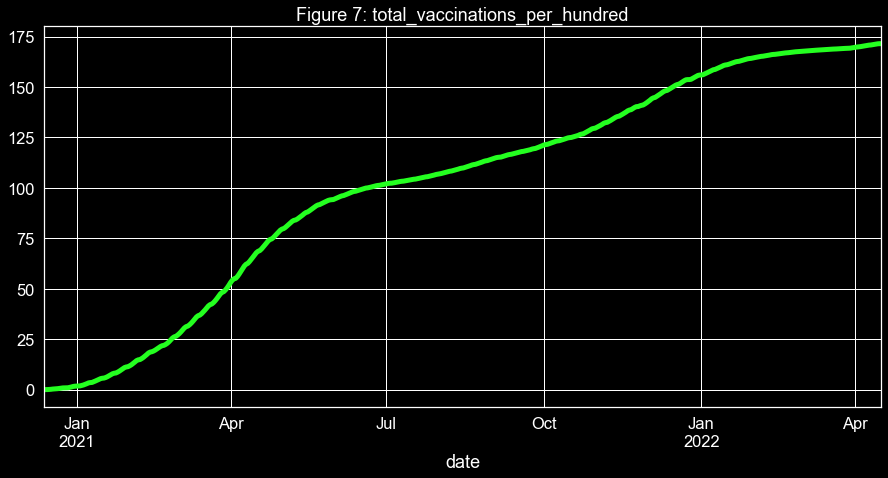

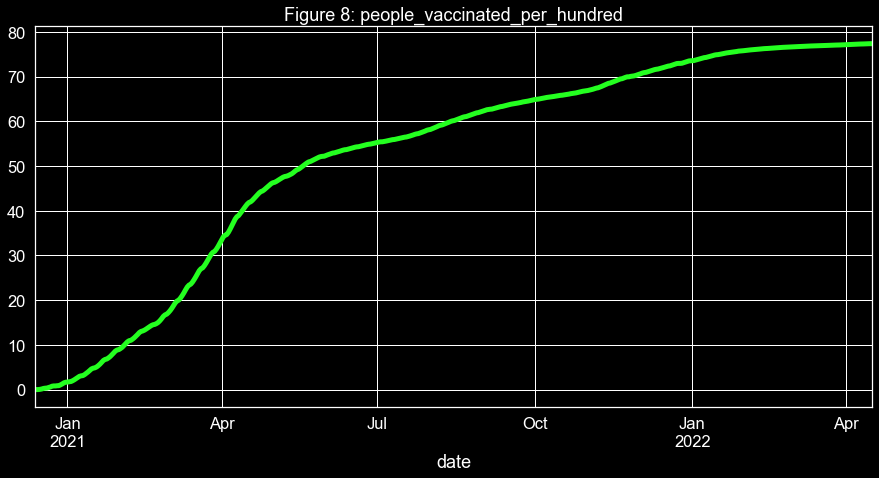

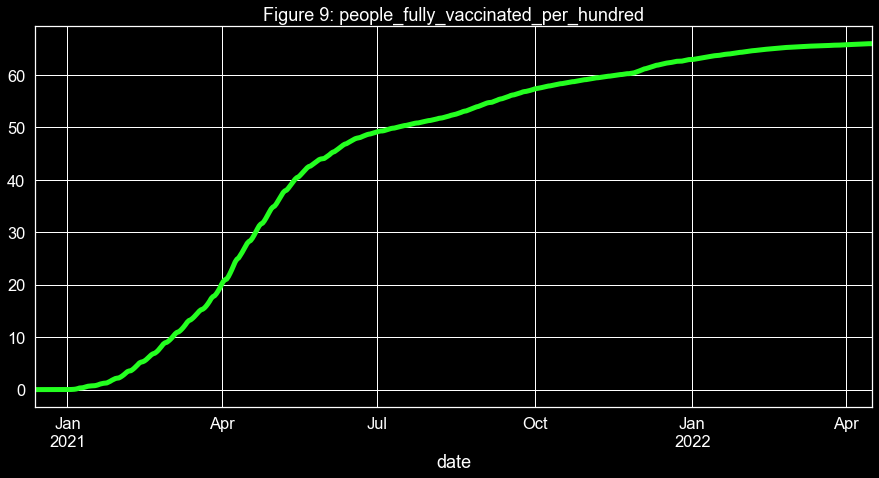

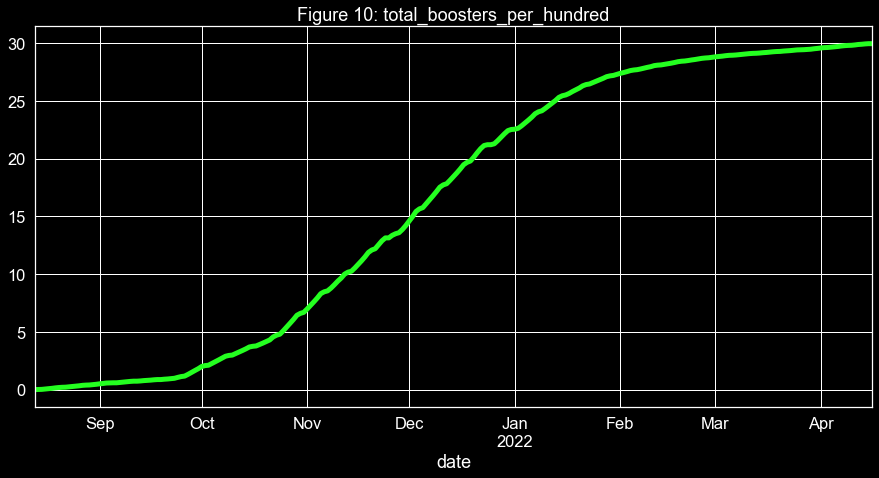

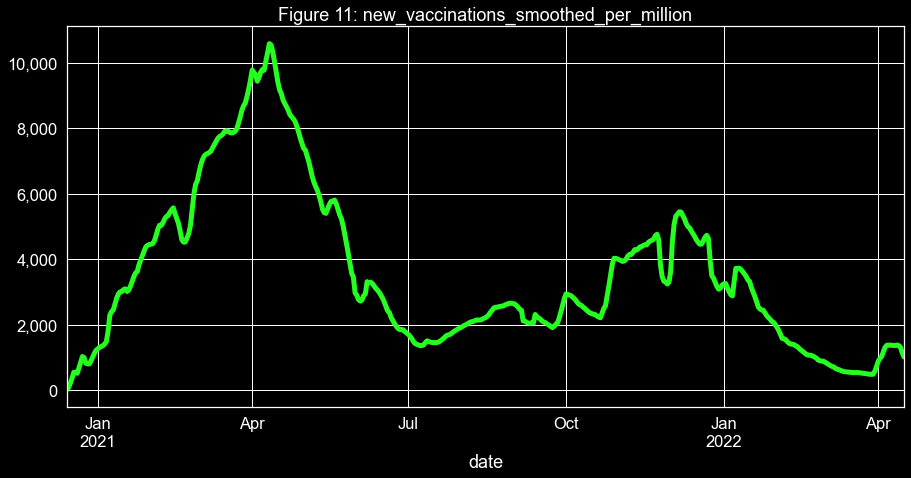

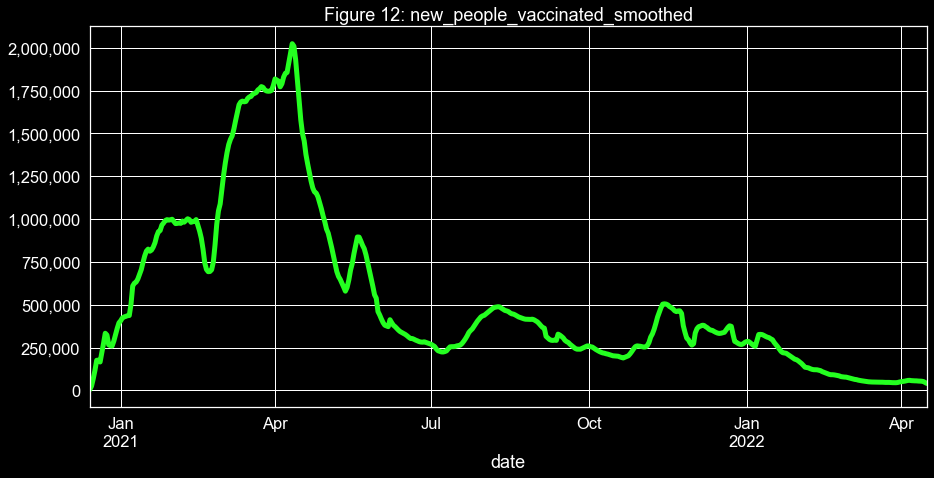

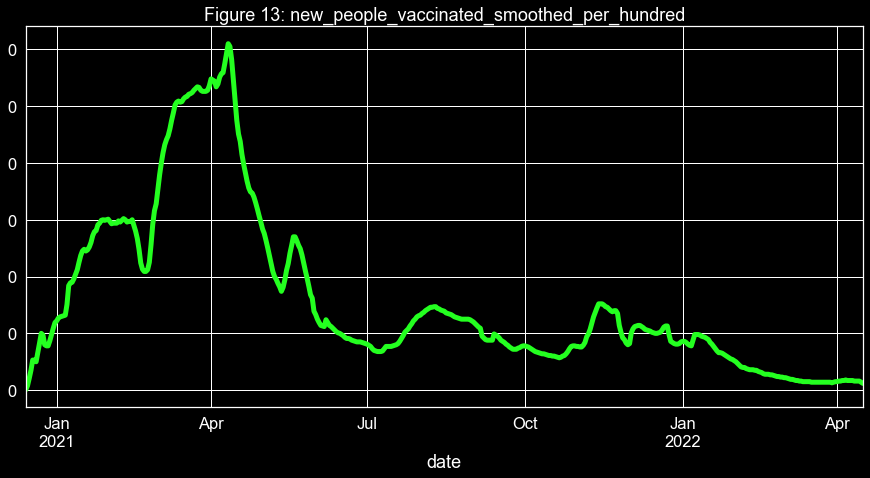

Wall time: 2.89 s


In [13]:
%%time
for i,x in enumerate(vax):
    
    ax=df[f'{x}'].dropna().plot(c='#24ff20',lw=5)
    ax.set_title(f"Figure {i+1}: {x}")
    plt.ticklabel_format(style='plain', axis='y')
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.show()

# <font color = 'chartreuse'> Vaccinations per day w/ MA

Text(0.5, 1.0, 'Vaccine Rollouts per Day')

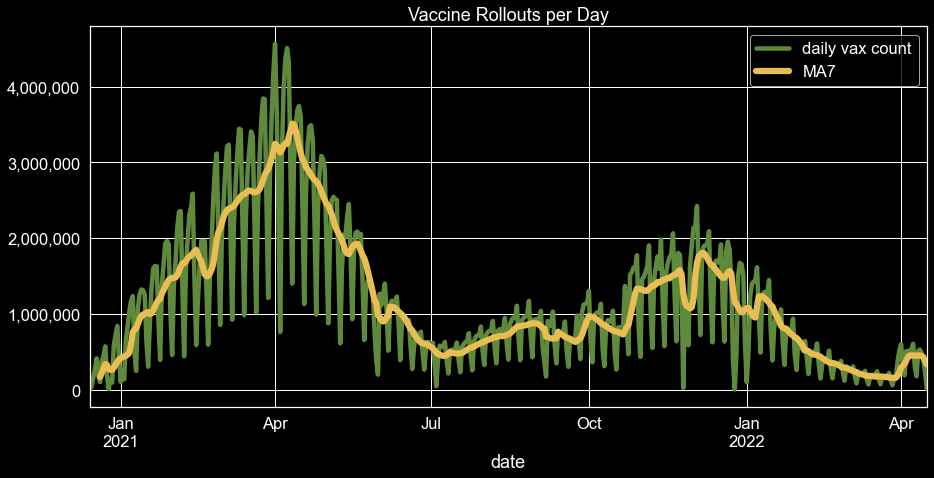

In [14]:
ma7=df['new_vaccinations'].dropna().rolling(7).mean()

ax = df['new_vaccinations'].dropna().plot(c='#5f893b',lw=4.5,label='daily vax count')
ax = ma7.plot(lw=6.25,c='#e8bd54', label='MA7')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Vaccine Rollouts per Day")
